In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. 데이터 
datasets = load_boston()

x = datasets.data
y = datasets.target

print(x.shape)
print(y.shape)

(506, 13)
(506,)


c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [3]:
# 2. train ,test 분리

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [4]:
# 3. 모델구성

model = Sequential(
    [
    # input_dim 은 행과 열만 앞으로 다차원이 나오면 input_shape 로 합니다
    # ex (100,10,5 ) 의 input_shape = (10,5)
    Dense(10,input_shape=(13,),activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(1)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [5]:
# 3.모델 컴파일
from tensorflow.keras.callbacks import EarlyStopping
# 모니터 : val_loss 를 관찰
# mode : 값이 커질때 멈춤 , 값이 작아져야함
# patience : 개선이 안된다고 바로 종료시키지 않고 에폭을 기다림
# 
earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =10,
                              restore_best_weights=True,
                              verbose=1
                              
                              )

model.compile(loss="mse",optimizer="adam")

# model.fit 이 반환한 기록을 저장
hist = model.fit(
                x_train,
                y_train,
                epochs=100,
                batch_size=3,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping]
                )


Epoch 1/100
108/108 [==============================] - 2s 6ms/step - loss: 150.0299 - val_loss: 176.5638
Epoch 2/100
108/108 [==============================] - 1s 5ms/step - loss: 68.9892 - val_loss: 86.3327
Epoch 3/100
108/108 [==============================] - 0s 5ms/step - loss: 62.6257 - val_loss: 68.6566
Epoch 4/100
108/108 [==============================] - 0s 4ms/step - loss: 57.9621 - val_loss: 71.8831
Epoch 5/100
108/108 [==============================] - 0s 4ms/step - loss: 59.3780 - val_loss: 68.6462
Epoch 6/100
108/108 [==============================] - 0s 4ms/step - loss: 55.5229 - val_loss: 66.6442
Epoch 7/100
108/108 [==============================] - 0s 5ms/step - loss: 55.2058 - val_loss: 63.3845
Epoch 8/100
108/108 [==============================] - 0s 5ms/step - loss: 56.1343 - val_loss: 60.1632
Epoch 9/100
108/108 [==============================] - 0s 5ms/step - loss: 54.9725 - val_loss: 67.1281
Epoch 10/100
108/108 [==============================] - 0s 4ms/step - l

In [6]:
# 평가 예측
loss = model.evaluate(x_test,y_test)

print("loss : ",loss)

4/4 [==============================] - 0s 2ms/step - loss: 23.3575
loss :  23.357513427734375


In [7]:
# hist.history 는 딕셔너리형으로 구성

print(hist.history['loss'])
print("=============================================================")
print(hist.history['val_loss'])


[150.02987670898438, 68.98918151855469, 62.62565994262695, 57.96211242675781, 59.377986907958984, 55.52289962768555, 55.20580291748047, 56.13426971435547, 54.9725227355957, 52.230438232421875, 50.00118637084961, 50.88015365600586, 48.96873474121094, 49.05157470703125, 46.8311653137207, 46.74591064453125, 47.193355560302734, 44.352882385253906, 43.23701858520508, 43.184051513671875, 44.649742126464844, 39.61309814453125, 41.10519790649414, 40.51932144165039, 36.02177429199219, 36.49741744995117, 36.880706787109375, 36.09913635253906, 36.578758239746094, 33.98777770996094, 36.45014572143555, 32.817626953125, 34.248355865478516, 32.0149040222168, 35.38134765625, 31.46441650390625, 30.71158218383789, 28.316085815429688, 30.198930740356445, 27.909040451049805, 28.008996963500977, 28.708492279052734, 27.719810485839844, 28.655969619750977, 28.806976318359375, 27.096942901611328, 27.91282081604004, 25.553266525268555, 24.404090881347656, 26.58911895751953, 24.0178165435791, 25.17873764038086,

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

print("버전",mpl.__version__)
print("설치위치",mpl.__file__)
print("설정위치",mpl.matplotlib_fname())

버전 3.6.2
설치위치 c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\matplotlib\__init__.py
설정위치 c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\matplotlib\mpl-data\matplotlibrc


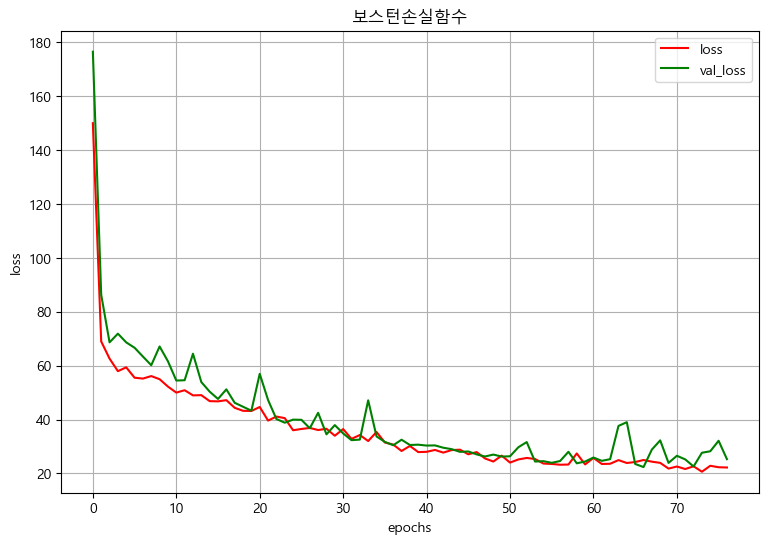

In [11]:
# 시각화
import matplotlib.pyplot as plt

# 필롯의 사이즈
plt.figure(figsize =(9,6))

plt.plot(hist.history["loss"],c ="red",label="loss")
plt.plot(hist.history["val_loss"],c="green",label="val_loss")
plt.grid() # 격자 표시
plt.xlabel("epochs,에포크") # x 라벨 표시 

plt.ylabel("loss") # y 라벨 표시
plt.title("보스턴손실함수") # 그래프의 타이틀 표시
plt.legend(loc = "upper right") # 그래프의 범주 표시
plt.show() # 그래프를 보여줘